In [1]:
from sklearn.metrics import mean_absolute_error # Загружаем нужные библиотеки.
from sklearn.neural_network import MLPRegressor # Загружаем модель.
import pandas as pd
import matplotlib.pyplot as plt
usd_rates=pd.read_excel("usd_rates.xlsx") # Считываем excel файл данных об изменении курса доллара за период с 10.01.17 по 31.12.19.
usd_rates

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США
...,...,...,...,...
735,1,2019-12-25,62.1673,Доллар США
736,1,2019-12-26,61.7164,Доллар США
737,1,2019-12-27,61.7676,Доллар США
738,1,2019-12-28,62.0315,Доллар США


In [2]:
past=28 # Количество дней на которых будет обучаться программа(неделя прошлая).
future=7 # Количество дней на которые будет прогнозироваться курс доллара(неделя следующая).

In [3]:
money=usd_rates.curs # Интересует нас лишь сам курс доллара, поэтому от лишних столбиков избавляемся. Получившийся датасет присваиваем новой переменной.
money

0      59.8961
1      59.9533
2      60.1614
3      59.4978
4      59.3700
        ...   
735    62.1673
736    61.7164
737    61.7676
738    62.0315
739    61.9057
Name: curs, Length: 740, dtype: float64

In [4]:
start=past # Так как относительно определённого дня будет отниматься 7, чтобы посмотреть на 7 дней в прошлое, тогда вот это определённое число должно быть не меньше 7
end=len(money)-future # аналогично определённое число должно быть ещё и не больше 733

In [5]:
table=[]
for i in range(start, end): # В пустой 'table' список добавляем 726 раз список 's', состощий из срезов датафрейма 'money', в итоге которого в каждом 's' будет храниться 14 чисел(курс доллара)
    s=money[(i-past):(i+future)] # из которых 7 чисел курс доллара на этой неделе, а другие 7 чисел курс доллара на будущей неделе. 
    table.append(list(s))

In [6]:
past_columns=[]
for i in range(past): # В пустой список 'past_columns' добавляем 7 раз названия колонок "past_0-6" будущего датафрейма , на которых будет обучаться программа.
    past_columns.append(f'past_{i}')
print(past_columns)    

['past_0', 'past_1', 'past_2', 'past_3', 'past_4', 'past_5', 'past_6', 'past_7', 'past_8', 'past_9', 'past_10', 'past_11', 'past_12', 'past_13', 'past_14', 'past_15', 'past_16', 'past_17', 'past_18', 'past_19', 'past_20', 'past_21', 'past_22', 'past_23', 'past_24', 'past_25', 'past_26', 'past_27']


In [7]:
future_columns=[]
for i in range(future): # В пустой список 'future_columns' добавляем 7 раз названия колонок "future_0-6" будущего датафрейма, которые будут прогнозироваться.
    future_columns.append(f'future_{i}')
print(future_columns) 

['future_0', 'future_1', 'future_2', 'future_3', 'future_4', 'future_5', 'future_6']


In [8]:
data=pd.DataFrame(table,columns=(past_columns+future_columns)) # создаём датафрейм принимающий аргументы: основной датасет и названия колонок соответственно.
data

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,...,58.0619,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,...,57.7388,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,...,56.7719,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,...,57.1507,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,...,57.6342,58.0967,57.8590,57.4762,57.9371,57.9627,58.3776,58.4067,58.9099,58.3370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,63.2480,63.5880,63.7298,63.7295,63.9121,63.8530,64.2009,64.2101,63.8881,63.7542,...,63.5788,63.5653,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499
701,63.5880,63.7298,63.7295,63.9121,63.8530,64.2009,64.2101,63.8881,63.7542,63.7730,...,63.5653,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673
702,63.7298,63.7295,63.9121,63.8530,64.2009,64.2101,63.8881,63.7542,63.7730,64.0213,...,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673,61.7164
703,63.7295,63.9121,63.8530,64.2009,64.2101,63.8881,63.7542,63.7730,64.0213,63.8430,...,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673,61.7164,61.7676


In [9]:
#Обучающая выборка
x=data[past_columns][:-10] # Разобъём датафрейм на 2(курс доллара за 'past' и за 'future' для дальнейшего обучения на них программы), а потом в каждом из низ отберём все строки кроме 10 последних 
y=data[future_columns][:-10] # которые отберём для тестового датасета. На этих датасетах 'x' и 'y' программа будет обучаться.

In [10]:
#Тестовая выборка
x_test=data[past_columns][-10:] # На этих же данных программа будет тестрироваться.  
y_test=data[future_columns][-10:]

In [34]:
from sklearn.model_selection import GridSearchCV
RFR=MLPRegressor(random_state=42)
params={
    'hidden_layer_sizes':(50,255,5),
    'activation':['relu'],
    'solver':['lbfgs'],
    'max_iter':range(200,1000,15),
}
GS=GridSearchCV(RFR,params,'neg_mean_absolute_error', cv=5,n_jobs=-1)

In [35]:
GS.fit(x,y) # Модель тренеруется на обучающей выборке 'x', 'y'.

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=42, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_

Day №0, error=0.5749336256857832


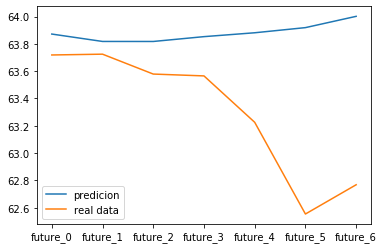

Day №1, error=0.642398069482545


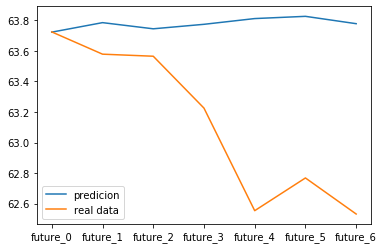

Day №2, error=0.7371016007843484


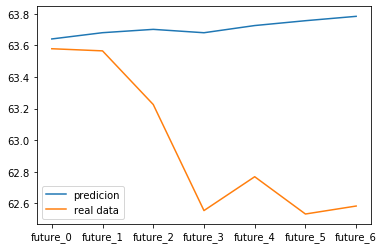

Day №3, error=0.8957952411575728


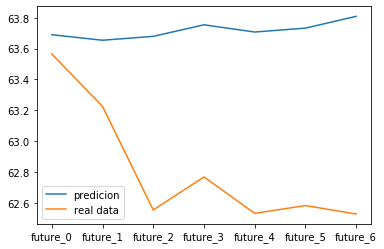

Day №4, error=0.9382521571730434


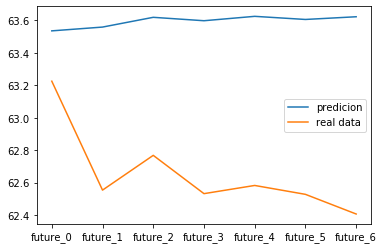

Day №5, error=0.8435284282937171


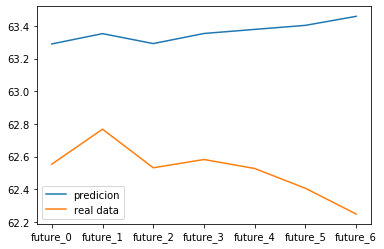

Day №6, error=0.3474459897708613


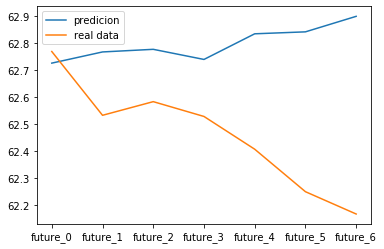

Day №7, error=0.4966272239394769


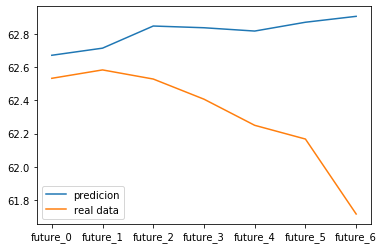

Day №8, error=0.4924203954354707


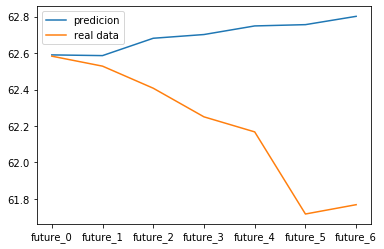

Day №9, error=0.6163317635568138


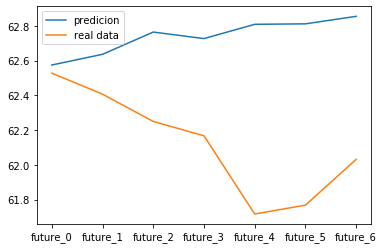

In [36]:
for i in range(10): # Проверим точность программы на осонове 10 дней из тестовой выборки.
    prediction=GS.best_estimator_.predict([x_test.iloc[i]]) # Прогноз модели i-того дня. 
    err=mean_absolute_error(prediction[0], y_test.iloc[i]) # Находим минимальное абсолютное значение между прогнозом и реальными данными.
    print(f'Day №{i}, error={err}')
    plt.plot(prediction[0], label='predicion') # Визуализируем прогноз модели в виде графика.
    plt.plot(y_test.iloc[i], label='real data') # Визуализируем реальные данные в виде графика.
    plt.legend() # Нужно чтобы каждый график отображался своим цветом для удобства.
    plt.show() # Каждую итерацию будет выводится график 2-ух функции.

In [38]:
GS.best_score_

-0.6165053753926931